# Startup names

In [88]:
import numpy as np
import random
import matplotlib.pyplot as plt
import tensorflow as tf

In [89]:
keras = tf.keras
with open("companies.csv", mode="r", encoding="utf-8") as corpus_file:
    corpus = corpus_file.read()
    corpus_length = len(corpus)
print("Loaded a corpus of {0} characters".format(corpus_length))

Loaded a corpus of 2567986 characters


In [90]:
# Get a unique identifier for each char in the corpus, 
# then make some dicts to ease encoding and decoding
chars = sorted(list(set(corpus)))
num_chars = len(chars)
encoding = {c: i for i, c in enumerate(chars)}
decoding = {i: c for i, c in enumerate(chars)}
print("Our corpus contains {0} unique characters.".format(num_chars))

Our corpus contains 150 unique characters.


In [91]:
print(encoding)
print(decoding)

{'\n': 0, ' ': 1, '!': 2, '"': 3, '#': 4, '$': 5, '%': 6, '&': 7, "'": 8, '(': 9, ')': 10, '*': 11, '+': 12, ',': 13, '-': 14, '.': 15, '/': 16, '0': 17, '1': 18, '2': 19, '3': 20, '4': 21, '5': 22, '6': 23, '7': 24, '8': 25, '9': 26, ':': 27, '=': 28, '>': 29, '?': 30, '@': 31, 'A': 32, 'B': 33, 'C': 34, 'D': 35, 'E': 36, 'F': 37, 'G': 38, 'H': 39, 'I': 40, 'J': 41, 'K': 42, 'L': 43, 'M': 44, 'N': 45, 'O': 46, 'P': 47, 'Q': 48, 'R': 49, 'S': 50, 'T': 51, 'U': 52, 'V': 53, 'W': 54, 'X': 55, 'Y': 56, 'Z': 57, '[': 58, '\\': 59, ']': 60, '^': 61, '_': 62, 'a': 63, 'b': 64, 'c': 65, 'd': 66, 'e': 67, 'f': 68, 'g': 69, 'h': 70, 'i': 71, 'j': 72, 'k': 73, 'l': 74, 'm': 75, 'n': 76, 'o': 77, 'p': 78, 'q': 79, 'r': 80, 's': 81, 't': 82, 'u': 83, 'v': 84, 'w': 85, 'x': 86, 'y': 87, 'z': 88, '{': 89, '|': 90, '}': 91, '~': 92, '\x81': 93, '\x82': 94, '\x83': 95, '\x84': 96, '\x85': 97, '\x86': 98, '\x87': 99, '\x88': 100, '\x89': 101, '\x8a': 102, '\x8b': 103, '\x8c': 104, '\x8d': 105, '\x8e': 

## Many to one approach

In [92]:
# chop up our data into X and y, slice into roughly 
# (num_chars / skip) overlapping 'sentences' of length 
# sentence_length, and encode the chars
seq_length = 10
skip = 3
X_data = []
y_data = []
for i in range (0, len(corpus) - seq_length, skip):
    seq = corpus[i:i + seq_length]
    next_char = corpus[i + seq_length]
    X_data.append([encoding[char] for char in seq])
    y_data.append(encoding[next_char])

num_seq = len(X_data)
print("Sliced our corpus into {0} sentences of length {1}"
      .format(num_seq, seq_length))

Sliced our corpus into 855992 sentences of length 10


In [93]:
print('Encoded data[0]  : {}'.format(X_data[0]))
print('Decoded data[0]  : {}'.format([decoding[idx] for idx in X_data[0]]))
print('Target of data[0]: {}'.format(decoding[y_data[0]]))

Encoded data[0]  : [39, 63, 81, 70, 78, 74, 63, 87, 1, 40]
Decoded data[0]  : ['H', 'a', 's', 'h', 'p', 'l', 'a', 'y', ' ', 'I']
Target of data[0]: n


In [94]:
# Vectorize our data and labels. We want everything in one-hot.
X = np.zeros((num_seq, seq_length, num_chars), dtype=bool)
y = np.zeros((num_seq, num_chars), dtype=bool)
for i, seq in enumerate(X_data):
    for t, encoded_char in enumerate(seq):
        X[i, t, encoded_char] = 1
    y[i, y_data[i]] = 1

# Double check our vectorized data before we sink hours into fitting a model
print("Sanity check y. Dimension: {0} # Sequence: {1} Characters in corpus: {2}"
      .format(y.shape, num_seq, len(chars)))
print("Sanity check X. Dimension: {0} Sequence length: {1}"
      .format(X.shape, seq_length))

X_train = X
y_train = y

Sanity check y. Dimension: (855992, 150) # Sequence: 855992 Characters in corpus: 150
Sanity check X. Dimension: (855992, 10, 150) Sequence length: 10


In [95]:
# Define our model
model = keras.models.Sequential()
model.add(keras.layers.Input(shape=(seq_length, num_chars)))
model.add(keras.layers.SimpleRNN(units=128, return_sequences=False))
model.add(keras.layers.Dense(num_chars))
model.add(keras.layers.Activation('softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_2 (SimpleRNN)    (None, 128)               35712     
                                                                 
 dense_5 (Dense)             (None, 150)               19350     
                                                                 
 activation_4 (Activation)   (None, 150)               0         
                                                                 
Total params: 55,062
Trainable params: 55,062
Non-trainable params: 0
_________________________________________________________________


Epoch 1/15
6688/6688 [==============================] - 112s 16ms/step - loss: 2.5014 - accuracy: 0.3031
Epoch 2/15
6688/6688 [==============================] - 109s 16ms/step - loss: 2.2204 - accuracy: 0.3708
Epoch 3/15
6688/6688 [==============================] - 109s 16ms/step - loss: 2.1368 - accuracy: 0.3926
Epoch 4/15
6688/6688 [==============================] - 107s 16ms/step - loss: 2.0896 - accuracy: 0.4054
Epoch 5/15
6688/6688 [==============================] - 100s 15ms/step - loss: 2.0602 - accuracy: 0.4139
Epoch 6/15
6688/6688 [==============================] - 107s 16ms/step - loss: 2.0380 - accuracy: 0.4203
Epoch 7/15
6688/6688 [==============================] - 112s 17ms/step - loss: 2.0214 - accuracy: 0.4248
Epoch 8/15
6688/6688 [==============================] - 108s 16ms/step - loss: 2.0083 - accuracy: 0.4285
Epoch 9/15
6688/6688 [==============================] - 109s 16ms/step - loss: 1.9981 - accuracy: 0.4307
Epoch 10/15
6688/6688 [==============================] 

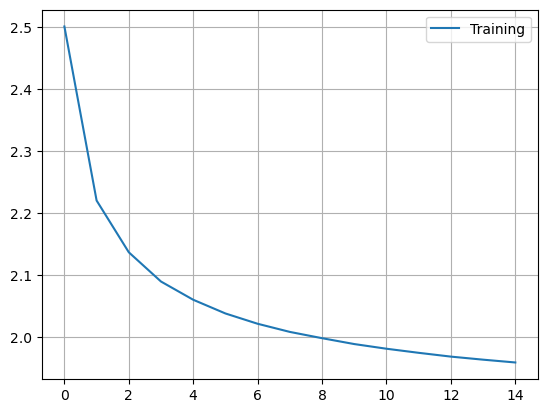

In [96]:
#training time
log = model.fit(X, y, epochs=15, batch_size=128)
plt.plot(log.history['loss'], label='Training')
plt.legend()
plt.grid()

In [97]:

def make_seed(seed_phrase=""):
        if seed_phrase:  # make sure the seed has the right length
            phrase_length = len(seed_phrase)
            pattern = ""
            for i in range (0, seq_length):
                pattern += seed_phrase[i % phrase_length]
        else:            # sample randomly the seed from corpus
            seed = random.randint(0, corpus_length - sentence_length)
            pattern = corpus[seed:seed + sentence_length]
        return pattern

seed_pattern = make_seed("Technology")
print("seed = " + seed_pattern)

X = np.zeros((1, seq_length, num_chars), dtype=float)
for i, character in enumerate(seed_pattern):
    X[0, i, encoding[character]] = 1

generated_text = ""
for i in range(500):
    output_prob = model.predict(X, verbose=0)[0]
    # in previous line predict() gives a tensor of shape (1, 65) 
    # with 1 being the size of the batch, for that we use [0] to get a vector
    prediction = np.random.choice(num_chars, p = output_prob )
    generated_text += decoding[prediction]
    activations = np.zeros((1, 1, num_chars), dtype=bool)
    activations[0, 0, prediction] = 1
    #now remove first char and glue the predicted one
    X = np.concatenate((X[:, 1:, :], activations), axis=1)
print(generated_text)

seed = Technology

PAtrffacisional Solutions, Onc Stedight
Vealt Solutions
Preafery Televor Lass
Sperrrocker
Controction Sindersintigno VlioMec
Vellybock Ltd.
Yacks
Foar
UpSonacol
HoGriptneet
Pandrain Systems
PeardeParce
Amion Technologies
Mixsofie
Sparken UP olapitity
Tome Unleation Cluend
LeakSReditpory Semiten
Acreision Corporation Cinedoy
Appie Spory Plcery Solutional Science Technology Cretise Services
AppirtPointer Inscierce
Thorron Logion
Forbon Fetar & SF D.)
CarcheonWise
Piclocom
Synawity, Inc."
WebPropi


The accuracy of rougly 0.44 is of course not very good, but I still think the results are pretty decent even though some names do not make sense at all. I think the following generated names are interesting:  
SynTech    
CHOD Robotics  
X  
Tuile Juice  
Bermocalyer Professional  

## LSTM

In [98]:
model = keras.models.Sequential()
model.add(keras.layers.Input(shape=(seq_length, num_chars)))
model.add(keras.layers.LSTM(units=128))
model.add(keras.layers.Dense(num_chars))
model.add(keras.layers.Activation('softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 128)               142848    
                                                                 
 dense_6 (Dense)             (None, 150)               19350     
                                                                 
 activation_5 (Activation)   (None, 150)               0         
                                                                 
Total params: 162,198
Trainable params: 162,198
Non-trainable params: 0
_________________________________________________________________


Epoch 1/10
6688/6688 [==============================] - 79s 11ms/step - loss: 2.6031 - accuracy: 0.2738
Epoch 2/10
6688/6688 [==============================] - 75s 11ms/step - loss: 2.1861 - accuracy: 0.3796
Epoch 3/10
6688/6688 [==============================] - 77s 12ms/step - loss: 2.0572 - accuracy: 0.4156
Epoch 4/10
6688/6688 [==============================] - 77s 12ms/step - loss: 1.9844 - accuracy: 0.4349
Epoch 5/10
6688/6688 [==============================] - 96s 14ms/step - loss: 1.9369 - accuracy: 0.4477
Epoch 6/10
6688/6688 [==============================] - 98s 15ms/step - loss: 1.9025 - accuracy: 0.4568
Epoch 7/10
6688/6688 [==============================] - 72s 11ms/step - loss: 1.8752 - accuracy: 0.4640
Epoch 8/10
6688/6688 [==============================] - 71s 11ms/step - loss: 1.8528 - accuracy: 0.4696
Epoch 9/10
6688/6688 [==============================] - 81s 12ms/step - loss: 1.8338 - accuracy: 0.4743
Epoch 10/10
6688/6688 [==============================] - 103s 15

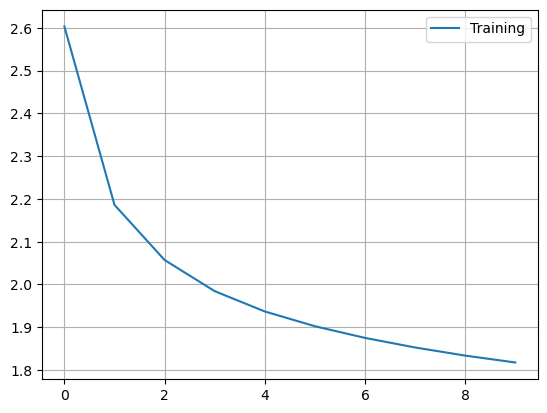

In [99]:
log = model.fit(X_train, y_train, epochs=10, batch_size=128)
plt.plot(log.history['loss'], label='Training')
plt.legend()
plt.grid()

In [100]:

def make_seed(seed_phrase=""):
        if seed_phrase:  # make sure the seed has the right length
            phrase_length = len(seed_phrase)
            pattern = ""
            for i in range (0, seq_length):
                pattern += seed_phrase[i % phrase_length]
        else:            # sample randomly the seed from corpus
            seed = random.randint(0, corpus_length - sentence_length)
            pattern = corpus[seed:seed + sentence_length]
        return pattern

seed_pattern = make_seed("Technology")
print("seed = " + seed_pattern)

X = np.zeros((1, seq_length, num_chars), dtype=float)
for i, character in enumerate(seed_pattern):
    X[0, i, encoding[character]] = 1

generated_text = ""
for i in range(500):
    output_prob = model.predict(X, verbose=0)[0]
    # in previous line predict() gives a tensor of shape (1, 65) 
    # with 1 being the size of the batch, for that we use [0] to get a vector
    prediction = np.random.choice(num_chars, p = output_prob )
    generated_text += decoding[prediction]
    activations = np.zeros((1, 1, num_chars), dtype=bool)
    activations[0, 0, prediction] = 1
    #now remove first char and glue the predicted one
    X = np.concatenate((X[:, 1:, :], activations), axis=1)
print(generated_text)

seed = Technology
 Property Genition Systems Investrissive
WOP power Ency FPH
Ottrie Brokion Communications
Gray-dot Instruments
FoodLink
Posico Holding Group C Cayver.com
Tripomatt
Leamshopp
eApech Enterprise
Xpart Software
FouredFit
Prokabakla
Evero Solutions
Assoin Metic
Oiwlide Solutions
Koter.com
Vidco Network
Cloudsecr
ArtinPlas
ClouchMobile
StyakMark
New Netwowk & Security Contec
Negro
Information Solutions
Ricuent
Makawtysaple New Dock Technology Network
Fotomet
Sigx1
Futionul Pace
Schofas
Spina.st Limite


The accuracy improves a little bit to 0.4781. I think it's fair to say that the names that are being geneareted are better overall. Especially strange names do not occur as often anymore (probably because the long term memory works better).

## Different data set (baby names)
I found a set of US baby names (available here: https://www.kaggle.com/datasets/kaggle/us-baby-names?resource=download&select=NationalNames.csv).

In [1]:
import pandas as pd

df = pd.read_csv("NationalNames.csv")
print(df.head())
print(df.info())

   Id       Name  Year Gender  Count
0   1       Mary  1880      F   7065
1   2       Anna  1880      F   2604
2   3       Emma  1880      F   2003
3   4  Elizabeth  1880      F   1939
4   5     Minnie  1880      F   1746
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1825433 entries, 0 to 1825432
Data columns (total 5 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   Id      int64 
 1   Name    object
 2   Year    int64 
 3   Gender  object
 4   Count   int64 
dtypes: int64(3), object(2)
memory usage: 69.6+ MB
None


In [2]:
names = df["Name"].values.tolist()
corpus = []
for name in names:
    corpus += [c for c in name]
corpus_length = len(corpus)
print("Loaded a corpus of {0} characters".format(corpus_length))

Loaded a corpus of 11270398 characters


In [3]:
# Get a unique identifier for each char in the corpus, 
# then make some dicts to ease encoding and decoding
chars = sorted(list(set(corpus)))
print(chars)
num_chars = len(chars)
encoding = {c: i for i, c in enumerate(chars)}
decoding = {i: c for i, c in enumerate(chars)}
print("Our corpus contains {0} unique characters.".format(num_chars))

['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']
Our corpus contains 52 unique characters.


In [4]:
print(encoding)
print(decoding)

{'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6, 'H': 7, 'I': 8, 'J': 9, 'K': 10, 'L': 11, 'M': 12, 'N': 13, 'O': 14, 'P': 15, 'Q': 16, 'R': 17, 'S': 18, 'T': 19, 'U': 20, 'V': 21, 'W': 22, 'X': 23, 'Y': 24, 'Z': 25, 'a': 26, 'b': 27, 'c': 28, 'd': 29, 'e': 30, 'f': 31, 'g': 32, 'h': 33, 'i': 34, 'j': 35, 'k': 36, 'l': 37, 'm': 38, 'n': 39, 'o': 40, 'p': 41, 'q': 42, 'r': 43, 's': 44, 't': 45, 'u': 46, 'v': 47, 'w': 48, 'x': 49, 'y': 50, 'z': 51}
{0: 'A', 1: 'B', 2: 'C', 3: 'D', 4: 'E', 5: 'F', 6: 'G', 7: 'H', 8: 'I', 9: 'J', 10: 'K', 11: 'L', 12: 'M', 13: 'N', 14: 'O', 15: 'P', 16: 'Q', 17: 'R', 18: 'S', 19: 'T', 20: 'U', 21: 'V', 22: 'W', 23: 'X', 24: 'Y', 25: 'Z', 26: 'a', 27: 'b', 28: 'c', 29: 'd', 30: 'e', 31: 'f', 32: 'g', 33: 'h', 34: 'i', 35: 'j', 36: 'k', 37: 'l', 38: 'm', 39: 'n', 40: 'o', 41: 'p', 42: 'q', 43: 'r', 44: 's', 45: 't', 46: 'u', 47: 'v', 48: 'w', 49: 'x', 50: 'y', 51: 'z'}


In [5]:
# chop up our data into X and y, slice into roughly 
# (num_chars / skip) overlapping 'sentences' of length 
# sentence_length, and encode the chars
seq_length = 10
skip = 3
X_data = []
y_data = []
for i in range (0, len(corpus) - seq_length, skip):
    seq = corpus[i:i + seq_length]
    next_char = corpus[i + seq_length]
    X_data.append([encoding[char] for char in seq])
    y_data.append(encoding[next_char])

num_seq = len(X_data)
print("Sliced our corpus into {0} sentences of length {1}"
      .format(num_seq, seq_length))

Sliced our corpus into 3756796 sentences of length 10


In [6]:
print('Encoded data[0]  : {}'.format(X_data[0]))
print('Decoded data[0]  : {}'.format([decoding[idx] for idx in X_data[0]]))
print('Target of data[0]: {}'.format(decoding[y_data[0]]))

Encoded data[0]  : [12, 26, 43, 50, 0, 39, 39, 26, 4, 38]
Decoded data[0]  : ['M', 'a', 'r', 'y', 'A', 'n', 'n', 'a', 'E', 'm']
Target of data[0]: m


In [11]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras

In [9]:
# Vectorize our data and labels. We want everything in one-hot.
X = np.zeros((num_seq, seq_length, num_chars), dtype=bool)
y = np.zeros((num_seq, num_chars), dtype=bool)
for i, seq in enumerate(X_data):
    for t, encoded_char in enumerate(seq):
        X[i, t, encoded_char] = 1
    y[i, y_data[i]] = 1

# Double check our vectorized data before we sink hours into fitting a model
print("Sanity check y. Dimension: {0} # Sequence: {1} Characters in corpus: {2}"
      .format(y.shape, num_seq, len(chars)))
print("Sanity check X. Dimension: {0} Sequence length: {1}"
      .format(X.shape, seq_length))

X_train = X
y_train = y

Sanity check y. Dimension: (3756796, 52) # Sequence: 3756796 Characters in corpus: 52
Sanity check X. Dimension: (3756796, 10, 52) Sequence length: 10


In [12]:
# Use LSTM
model = keras.models.Sequential()
model.add(keras.layers.Input(shape=(seq_length, num_chars)))
model.add(keras.layers.LSTM(units=128))
model.add(keras.layers.Dense(num_chars))
model.add(keras.layers.Activation('softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 128)               92672     
                                                                 
 dense (Dense)               (None, 52)                6708      
                                                                 
 activation (Activation)     (None, 52)                0         
                                                                 
Total params: 99,380
Trainable params: 99,380
Non-trainable params: 0
_________________________________________________________________


Epoch 1/10
29350/29350 [==============================] - 261s 8ms/step - loss: 1.9746 - accuracy: 0.4100
Epoch 2/10
29350/29350 [==============================] - 240s 8ms/step - loss: 1.6936 - accuracy: 0.4872
Epoch 3/10
29350/29350 [==============================] - 251s 9ms/step - loss: 1.6139 - accuracy: 0.5081
Epoch 4/10
29350/29350 [==============================] - 239s 8ms/step - loss: 1.5713 - accuracy: 0.5187
Epoch 5/10
29350/29350 [==============================] - 242s 8ms/step - loss: 1.5439 - accuracy: 0.5255
Epoch 6/10
29350/29350 [==============================] - 243s 8ms/step - loss: 1.5243 - accuracy: 0.5305
Epoch 7/10
29350/29350 [==============================] - 244s 8ms/step - loss: 1.5093 - accuracy: 0.5339
Epoch 8/10
29350/29350 [==============================] - 244s 8ms/step - loss: 1.4974 - accuracy: 0.5368
Epoch 9/10
29350/29350 [==============================] - 242s 8ms/step - loss: 1.4879 - accuracy: 0.5391
Epoch 10/10
29350/29350 [=====================

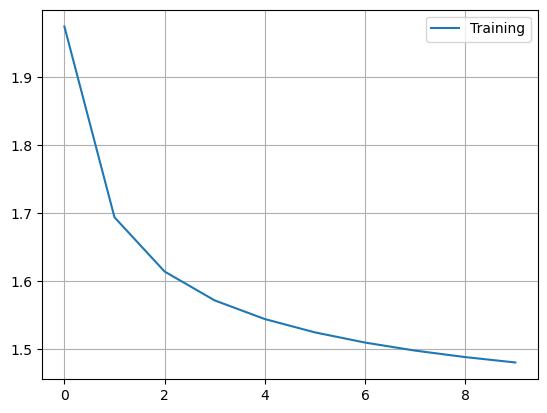

In [13]:
log = model.fit(X_train, y_train, epochs=10, batch_size=128)
plt.plot(log.history['loss'], label='Training')
plt.legend()
plt.grid()

In [ ]:
def camel_case_split(str):
    words = [[str[0]]]
 
    for c in str[1:]:
        if words[-1][-1].islower() and c.isupper():
            words.append(list(c))
        else:
            words[-1].append(c)
 
    return [''.join(word) for word in words]

def make_seed(seed_phrase=""):
        if seed_phrase:  # make sure the seed has the right length
            phrase_length = len(seed_phrase)
            pattern = ""
            for i in range (0, seq_length):
                pattern += seed_phrase[i % phrase_length]
        else:            # sample randomly the seed from corpus
            seed = random.randint(0, corpus_length - sentence_length)
            pattern = corpus[seed:seed + sentence_length]
        return pattern

seed_pattern = make_seed("Ashley")
print("seed = " + seed_pattern)

X = np.zeros((1, seq_length, num_chars), dtype=float)
for i, character in enumerate(seed_pattern):
    X[0, i, encoding[character]] = 1

generated_text = ""
for i in range(500):
    output_prob = model.predict(X, verbose=0)[0]
    # in previous line predict() gives a tensor of shape (1, 65) 
    # with 1 being the size of the batch, for that we use [0] to get a vector
    prediction = np.random.choice(num_chars, p = output_prob )
    generated_text += decoding[prediction]
    activations = np.zeros((1, 1, num_chars), dtype=bool)
    activations[0, 0, prediction] = 1
    #now remove first char and glue the predicted one
    X = np.concatenate((X[:, 1:, :], activations), axis=1)
print(camel_case_split(generated_text))